In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Dataset basic statistics

In [46]:
songs_df = pd.read_csv(os.path.join("data", "merged_songs_v1.csv"))
artists_df = pd.read_csv(os.path.join("data", "artists_v1.csv"))

songs_df.columns, artists_df.columns

(Index(['title', 'artist', 'title_listeners', 'title_scrobbles', 'title_tags',
        'genre_tags', 'title_duration', 'audio_path', 'yt_title', 'yt_url',
        'yt_duration', 'yt_views'],
       dtype='object'),
 Index(['artist', 'artist_listeners', 'artist_scrobbles', 'artist_tags'], dtype='object'))

As the ```artists_v1.csv``` file contains information about all fetched artists, we should filter only those who were left after preprocessing step (i.e., are present in ```songs_v1.csv```):

In [47]:
print("Number of artists before filtering: ", len(artists_df))
artists_df = artists_df[artists_df["artist"].isin(songs_df["artist"])]
print("Number of artists after filtering: ", len(artists_df))
assert len(artists_df) == len(songs_df["artist"].unique())

Number of artists before filtering:  205
Number of artists after filtering:  60


## Songs per artist

In [51]:
songs_per_artist = songs_df["artist"].value_counts()

print(f"Total number of songs: {len(songs_df)}\n")
print(f"Number of songs per artist:\n{songs_per_artist.describe()}")

Total number of songs: 3166

Number of songs per artist:
count    60.000000
mean     52.766667
std      19.916237
min      16.000000
25%      37.000000
50%      53.500000
75%      66.250000
max      94.000000
Name: artist, dtype: float64


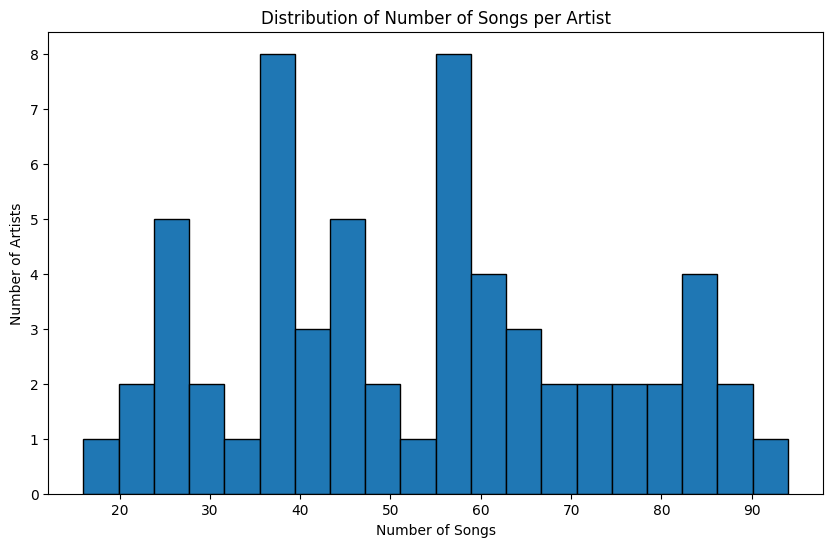

In [52]:
# plot number of songs per artists in bins
plt.figure(figsize=(10, 6))
plt.hist(songs_per_artist.values, bins=20, edgecolor='black')
plt.title("Distribution of Number of Songs per Artist")
plt.xlabel("Number of Songs")
plt.ylabel("Number of Artists")
plt.show()


In [71]:
print("10 artists with the biggest number of songs:")
songs_per_artist.head(10)

10 artists with the biggest number of songs:


–°–∫—Ä—è–±—ñ–Ω              94
–û–∫–µ–∞–Ω –ï–ª—å–∑–∏          87
O.Torvald            87
–í–æ–ø–ª—ñ –í—ñ–¥–æ–ø–ª—è—Å–æ–≤–∞    85
–¢–∞—Ä—Ç–∞–∫               85
–ú–∞—Ä—ñ—è –ë—É—Ä–º–∞–∫–∞        84
Artem Pivovarov      83
–ê–Ω—Ç–∏—Ç—ñ–ª–∞             80
–ê—Ä—Å–µ–Ω –ú—ñ—Ä–∑–æ—è–Ω        79
–ú–µ—Ä—Ç–≤–∏–π –ü—ñ–≤–µ–Ω—å       77
Name: artist, dtype: int64

## Popularity

### Artists

In [53]:
artists_df["artist_scrobbles"].describe()

count    6.000000e+01
mean     8.739923e+05
std      1.970353e+06
min      5.978800e+04
25%      1.319158e+05
50%      2.442805e+05
75%      8.040772e+05
max      1.355290e+07
Name: artist_scrobbles, dtype: float64

In [65]:
print("10 most popular artists (based on current listeners):")
artists_df.sort_values("artist_listeners", ascending=False).head(10)

10 most popular artists (based on current listeners):


artist  artist_listeners  artist_scrobbles  \
0     –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          203060.0        13552898.0   
1            Go_A          189946.0         4088960.0   
2         –ë—É–º–±–æ–∫—Å          174374.0         6424069.0   
4          KALUSH          106178.0         1850491.0   
7   alyona alyona           91289.0         1677579.0   
14           Lama           70056.0         1537189.0   
3         –°–∫—Ä—è–±—ñ–Ω           59090.0         2821158.0   
13          Kazka           58150.0         1103443.0   
24        TVORCHI           56405.0          627532.0   
6    The Hardkiss           53408.0         2134936.0   

                                          artist_tags  
0   ['rock', 'ukrainian', 'ukrainian rock', 'indie...  
1   ['ukrainian', 'folktronica', 'folk', 'electron...  
2   ['ukrainian', 'funk', 'reggae', 'hip-hop', 'fu...  
4   ['ukrainian', 'rap', 'hip-hop', 'ukraine', 'eu...  
7   ['ukrainian', 'rap', 'hip-hop', 'hip hop', 'tr...  
14  ['punk', 'ukrainian', 'hardcore punk', 'finnis...  
3   ['ukrainian', 'synthpop', 'pop-rock', 'electro...  
13  ['ukrainian', 'pop', 'ukraine', 'indie pop', '...  
24  ['pop', 'ukrainian', 'electronic', 'dance', 'u...  
6   ['ukrainian', 'electronic', 'dance', 'alternat...

In [66]:
print("10 least popular artists (based on current listeners):")
artists_df.sort_values("artist_listeners", ascending=True).head(10)

10 least popular artists (based on current listeners):


artist  artist_listeners  artist_scrobbles  \
130  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞            3457.0          108899.0   
117      –ù–∏—Ü–æ –ü–æ—Ç–≤–æ—Ä–Ω–æ            3871.0          126221.0   
186        –û—Ä–µ—Å—Ç –õ—é—Ç–∏–π            4492.0           82936.0   
154  –°–∫–∞–∂–∏ —â–æ—Å—å –ø–æ–≥–∞–Ω–µ            4715.0           82593.0   
197        –ö–∞—Ç—è Chilly            4952.0          119507.0   
105     –ñ–∞–¥–∞–Ω —ñ —Å–æ–±–∞–∫–∏            5128.0          155657.0   
156       –ë–µ–∑ –û–±–º–µ–∂–µ–Ω—å            5315.0           95218.0   
196      –ú–∞—Ä—ñ—è –ë—É—Ä–º–∞–∫–∞            5417.0          106046.0   
157        –Ü–≥–æ—Ä –ö–∞–π–¥–∞—à            5618.0           79910.0   
75     dity inzheneriv            5724.0          218071.0   

                                           artist_tags  
130  ['electronic', 'experimental', 'trip-hop', 'uk...  
117  ['ukrainian', 'hip hop', 'rap', 'electronic', ...  
186       ['ukrainian', 'comedy', 'parody', 'neofolk']  
154  ['psychedelic rock', 'ukrainian', 'indie pop',...  
197  ['ukrainian', 'ethnic', 'electronic', 'female ...  
105     ['ukrainian', 'punk rock', 'ska punk', 'rock']  
156      ['ukrainian', 'rock', 'rap', 'ukrainian rap']  
196  ['ukrainian', 'female vocalists', 'ukraine', '...  
157  ['indie pop', 'indie rock', 'ukrainian', 'lo-f...  
75   ['post-punk', 'ukrainian', 'alternative rock',...

In [54]:
artists_df["artist_listeners"].describe()

count        60.000000
mean      28799.450000
std       42927.621051
min        3457.000000
25%        6938.000000
50%       11885.500000
75%       31108.750000
max      203060.000000
Name: artist_listeners, dtype: float64

In [74]:
print("10 most popular artists (based on total scrobbles):")
artists_df.sort_values("artist_scrobbles", ascending=False).head(10)

10 most popular artists (based on total scrobbles):


artist  artist_listeners  artist_scrobbles  \
0     –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          203060.0        13552898.0   
2         –ë—É–º–±–æ–∫—Å          174374.0         6424069.0   
1            Go_A          189946.0         4088960.0   
3         –°–∫—Ä—è–±—ñ–Ω           59090.0         2821158.0   
6    The Hardkiss           53408.0         2134936.0   
4          KALUSH          106178.0         1850491.0   
7   alyona alyona           91289.0         1677579.0   
14           Lama           70056.0         1537189.0   
21         –¢–∞—Ä—Ç–∞–∫           35856.0         1233300.0   
16   –û–¥–∏–Ω –í –ö–∞–Ω–æ–µ           30398.0         1146448.0   

                                          artist_tags  
0   ['rock', 'ukrainian', 'ukrainian rock', 'indie...  
2   ['ukrainian', 'funk', 'reggae', 'hip-hop', 'fu...  
1   ['ukrainian', 'folktronica', 'folk', 'electron...  
3   ['ukrainian', 'synthpop', 'pop-rock', 'electro...  
6   ['ukrainian', 'electronic', 'dance', 'alternat...  
4   ['ukrainian', 'rap', 'hip-hop', 'ukraine', 'eu...  
7   ['ukrainian', 'rap', 'hip-hop', 'hip hop', 'tr...  
14  ['punk', 'ukrainian', 'hardcore punk', 'finnis...  
21  ['ukrainian', 'rapcore', 'alternative', 'hip-h...  
16  ['ukrainian', 'indie', 'folk', 'female vocal',...

In [73]:
print("10 least popular artists (based on total scrobbles):")
artists_df.sort_values("artist_scrobbles", ascending=True).head(10)

10 least popular artists (based on total scrobbles):


artist  artist_listeners  artist_scrobbles  \
199        To Eternity            6176.0           59788.0   
157        –Ü–≥–æ—Ä –ö–∞–π–¥–∞—à            5618.0           79910.0   
154  –°–∫–∞–∂–∏ —â–æ—Å—å –ø–æ–≥–∞–Ω–µ            4715.0           82593.0   
186        –û—Ä–µ—Å—Ç –õ—é—Ç–∏–π            4492.0           82936.0   
147   –ú–∞—à–∞ –ö–æ–Ω–¥—Ä–∞—Ç–µ–Ω–∫–æ            7218.0           89113.0   
173        –¢–∞—Ä–∞—Å –ß—É–±–∞–π            7718.0           91736.0   
194          –ù—É–º–µ—Ä 482            6963.0           94210.0   
152           –ì—É—Ä—Ç [–û]            6723.0           95211.0   
156       –ë–µ–∑ –û–±–º–µ–∂–µ–Ω—å            5315.0           95218.0   
196      –ú–∞—Ä—ñ—è –ë—É—Ä–º–∞–∫–∞            5417.0          106046.0   

                                           artist_tags  
199  ['ukrainian', 'pop', 'indie pop', 'ukranian', ...  
157  ['indie pop', 'indie rock', 'ukrainian', 'lo-f...  
154  ['psychedelic rock', 'ukrainian', 'indie pop',...  
186       ['ukrainian', 'comedy', 'parody', 'neofolk']  
147  ['ukrainian', 'pop', 'electropop', 'booba', 'u...  
173  ['ukrainian', 'ukraine', 'rock', 'ukrainian ro...  
194  ['ukrainian', 'rock', 'alternative', 'ukrainia...  
152  ['ukrainian', 'pop', 'electropop', 'indie pop'...  
156      ['ukrainian', 'rock', 'rap', 'ukrainian rap']  
196  ['ukrainian', 'female vocalists', 'ukraine', '...

### Songs

In [57]:
songs_df["title_listeners"].describe()

count      3165.000000
mean       1827.654028
std        5119.443019
min           1.000000
25%         192.000000
50%         593.000000
75%        1568.000000
max      163046.000000
Name: title_listeners, dtype: float64

In [78]:
columns = ["title", "artist", "title_listeners", "title_scrobbles",	"title_tags"]

print("10 most popular songs (based on current listeners):")
songs_df.sort_values("title_listeners", ascending=False).head(10)[columns]

10 most popular songs (based on current listeners):


title         artist  title_listeners  title_scrobbles  \
43              SHUM           Go_A         163046.0        2108741.0   
0            –ë–µ–∑ –±–æ—é    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          67241.0         500416.0   
155   Teresa & Maria  alyona alyona          64190.0         960536.0   
1363        –í–∞—Ö—Ç—ë—Ä–∞–º        –ë—É–º–±–æ–∫—Å          50701.0         393405.0   
1             –û–±—ñ–π–º–∏    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          40990.0         282632.0   
2           –ù–µ –ø–∏—Ç–∞–π    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          39876.0         303396.0   
44           Solovey           Go_A          39876.0         390694.0   
72             –¢–∞4—Ç–æ        –ë—É–º–±–æ–∫—Å          39346.0         313514.0   
45               –®—É–º           Go_A          39101.0         351027.0   
3     –ö–æ–ª–∏ —Ç–µ–±–µ –Ω–µ–º–∞    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          37672.0         239250.0   

                                             title_tags  
43                              ['folk', 'folktronica']  
0     ['alternative rock', 'pop rock', 'rock', 'ukra...  
155                ['hip hop', 'hip-hop', 'pop', 'rap']  
1363                                 ['funk', 'reggae']  
1     ['alternative rock', 'blues', 'rock', 'ukraini...  
2                            ['rock', 'ukrainian rock']  
44                              ['folk', 'folktronica']  
72                 ['funk', 'hip-hop', 'pop', 'reggae']  
45         ['ebm', 'electronic', 'folk', 'folktronica']  
3                            ['rock', 'ukrainian rock']

In [80]:
print("10 least popular songs (based on current listeners):")
songs_df.sort_values("title_listeners", ascending=True).head(10)[columns]

10 least popular songs (based on current listeners):


title             artist  title_listeners  title_scrobbles  \
2096          –ü–æ–ª–µ—Ç–∞–µ–º   –ú–∞—à–∞ –ö–æ–Ω–¥—Ä–∞—Ç–µ–Ω–∫–æ              1.0             27.0   
2682             Pitch        To Eternity              1.0              2.0   
1990                 1  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              1.0              1.0   
1989    –ù—ñ–±–∏ –Ü –ù–µ –ó–Ω–∞–≤  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              1.0              1.0   
2176            –•—Ç–æ —è?           –ì—É—Ä—Ç [–û]              1.0              3.0   
1988           –ú–µ–Ω—ñ 42  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              1.0              1.0   
1987    Live at On-Air  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              1.0              1.0   
1520  220+–¶—è—Ç–∫–∞+–ü–æ–ª—å–∫–∞          –ü–µ—Ä–∫–∞–ª–∞–±–∞              1.0              1.0   
2315     —Å–ø–∏ —Å–æ–±—ñ —Å–∞–º–∞        –Ü–≥–æ—Ä –ö–∞–π–¥–∞—à              1.0              1.0   
754      Black Costume     The Unsleeping              1.0              6.0   

                                       title_tags  
2096       ['electropop', 'pop', 'ukrainian pop']  
2682                         ['indie pop', 'pop']  
1990   ['electronic', 'experimental', 'trip-hop']  
1989   ['electronic', 'experimental', 'trip-hop']  
2176           ['electropop', 'indie pop', 'pop']  
1988   ['electronic', 'experimental', 'trip-hop']  
1987   ['electronic', 'experimental', 'trip-hop']  
1520    ['ethno-ska', 'folk', 'folk-punk', 'ska']  
2315         ['indie pop', 'indie rock', 'lo-fi']  
754   ['alternative rock', 'grunge', 'post-rock']

In [84]:
songs_df["title_scrobbles"].describe()

count    3.165000e+03
mean     1.152386e+04
std      4.982594e+04
min      1.000000e+00
25%      7.580000e+02
50%      2.804000e+03
75%      8.439000e+03
max      2.108741e+06
Name: title_scrobbles, dtype: float64

In [81]:
print("10 most popular songs (based on total scrobbles):")
songs_df.sort_values("title_scrobbles", ascending=False).head(10)[columns]

10 most popular songs (based on total scrobbles):


title         artist  title_listeners  title_scrobbles  \
43              SHUM           Go_A         163046.0        2108741.0   
155   Teresa & Maria  alyona alyona          64190.0         960536.0   
0            –ë–µ–∑ –±–æ—é    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          67241.0         500416.0   
1363        –í–∞—Ö—Ç—ë—Ä–∞–º        –ë—É–º–±–æ–∫—Å          50701.0         393405.0   
44           Solovey           Go_A          39876.0         390694.0   
45               –®—É–º           Go_A          39101.0         351027.0   
72             –¢–∞4—Ç–æ        –ë—É–º–±–æ–∫—Å          39346.0         313514.0   
2           –ù–µ –ø–∏—Ç–∞–π    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          39876.0         303396.0   
1             –û–±—ñ–π–º–∏    –û–∫–µ–∞–Ω –ï–ª—å–∑–∏          40990.0         282632.0   
2773         –ü–ª–∞–∫–∞–ª–∞          Kazka          29583.0         262664.0   

                                             title_tags  
43                              ['folk', 'folktronica']  
155                ['hip hop', 'hip-hop', 'pop', 'rap']  
0     ['alternative rock', 'pop rock', 'rock', 'ukra...  
1363                                 ['funk', 'reggae']  
44                              ['folk', 'folktronica']  
45         ['ebm', 'electronic', 'folk', 'folktronica']  
72                 ['funk', 'hip-hop', 'pop', 'reggae']  
2                            ['rock', 'ukrainian rock']  
1     ['alternative rock', 'blues', 'rock', 'ukraini...  
2773                                            ['pop']

In [82]:
print("10 least popular songs (based on total scrobbles):")
songs_df.sort_values("title_scrobbles", ascending=True).head(10)[columns]

10 least popular songs (based on total scrobbles):


title            artist  title_listeners  \
2315               —Å–ø–∏ —Å–æ–±—ñ —Å–∞–º–∞       –Ü–≥–æ—Ä –ö–∞–π–¥–∞—à              1.0   
2097       –∑–Ω–∞–π—à–ª–∞ —Å–≤—ñ–π —â–æ–¥–µ–Ω–Ω–∏–∫  –ú–∞—à–∞ –ö–æ–Ω–¥—Ä–∞—Ç–µ–Ω–∫–æ              1.0   
1136                  Navushnyky   dity inzheneriv              1.0   
1329       –ê —Ç–∏ —Å–ø–∏—Ç–∞–ª–∞ –º–µ–Ω—ñ —è–∫?      Sad Novelist              1.0   
2098   –í–∞–Ω—å–∫–∞-–í—Å—Ç–∞–Ω—å–∫–∞ ‚óè –∫–∞—Ä–∞–æ–∫–µ  –ú–∞—à–∞ –ö–æ–Ω–¥—Ä–∞—Ç–µ–Ω–∫–æ              1.0   
2688   Rich Love - Original Song       To Eternity              1.0   
1520            220+–¶—è—Ç–∫–∞+–ü–æ–ª—å–∫–∞         –ü–µ—Ä–∫–∞–ª–∞–±–∞              1.0   
1939                –î–∞–º–æ–∫–ª—ñ–≤ –º–µ—á       renie cares              1.0   
1362                      –î–æ–¥–æ–º—É      Sad Novelist              1.0   
2690  Electric Universe - Meteor       To Eternity              1.0   

      title_scrobbles                                         title_tags  
2315              1.0               ['indie pop', 'indie rock', 'lo-fi']  
2097              1.0             ['electropop', 'pop', 'ukrainian pop']  
1136              1.0  ['alternative', 'alternative rock', 'indie roc...  
1329              1.0           ['indie pop', 'indie rock', 'post-punk']  
2098              1.0             ['electropop', 'pop', 'ukrainian pop']  
2688              1.0                               ['indie pop', 'pop']  
1520              1.0          ['ethno-ska', 'folk', 'folk-punk', 'ska']  
1939              1.0          ['electropop', 'indie pop', 'indie rock']  
1362              1.0           ['indie pop', 'indie rock', 'post-punk']  
2690              1.0                               ['indie pop', 'pop']

## Genre tags

### Artist level

In [97]:
artists_df["artist_tags"] = artists_df["artist_tags"].apply(eval)

print("Number of unique tags: ", len(artists_df["artist_tags"].explode().unique()))

Number of unique tags:  126


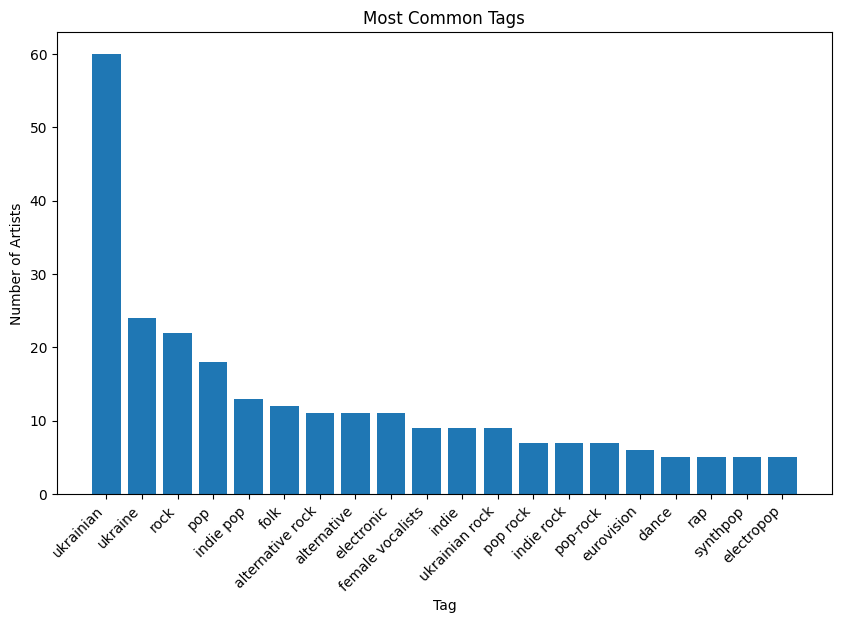

In [ ]:
tags_count = artists_df["artist_tags"].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(tags_count.head(20).index, tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Artist Common Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Artists")
plt.show()

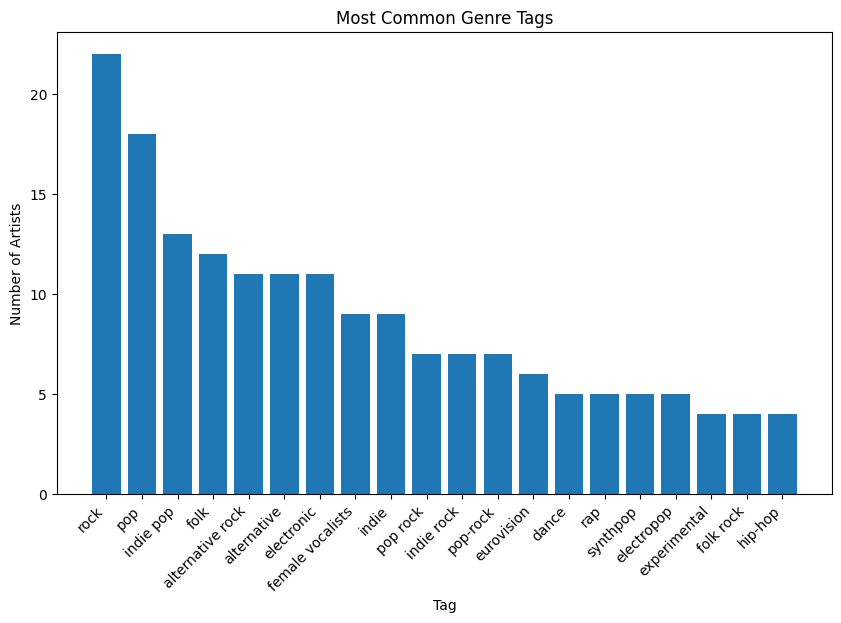

In [ ]:
genre_tags_count = tags_count[~tags_count.index.str.contains("ukr", case=False)]

plt.figure(figsize=(10, 6))
plt.bar(genre_tags_count.head(20).index, genre_tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Artist Genre Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Artists")
plt.show()

### Song level

In [ ]:
songs_df["title_tags"] = songs_df["title_tags"].apply(eval)
songs_df["genre_tags"] = songs_df["genre_tags"].apply(eval)

print("Number of unique tags in songs: ", len(songs_df["title_tags"].explode().unique()))
print("Number of unique genre tags in songs: ", len(songs_df["genre_tags"].explode().unique()))

Number of unique tags in songs:  140
Number of unique genre tags in songs:  25


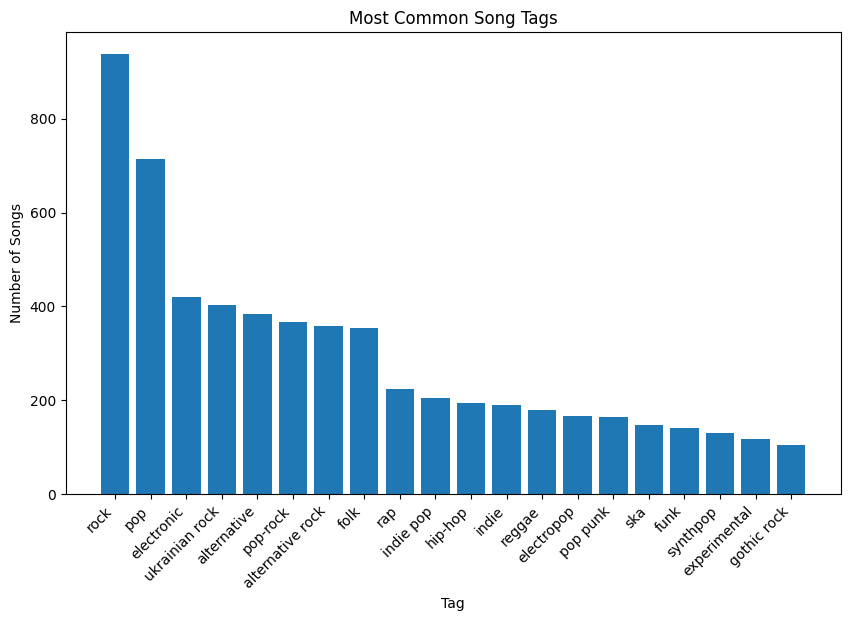

In [102]:
tags_count = songs_df["title_tags"].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(tags_count.head(20).index, tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Song Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Songs")
plt.show()

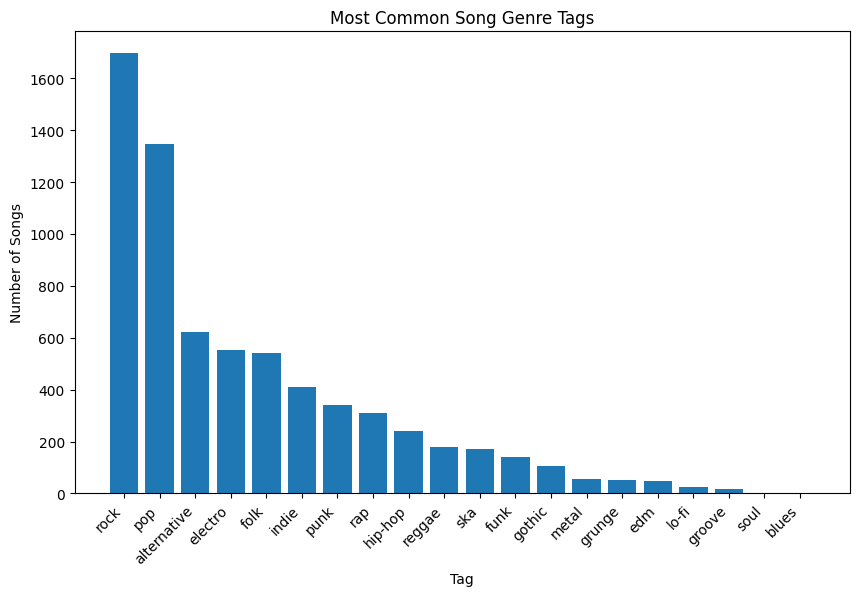

In [103]:
genre_tags_count = songs_df["genre_tags"].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(genre_tags_count.head(20).index, genre_tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Song Genre Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Songs")
plt.show()

## Total audio hours

In [105]:
total_duration = songs_df["yt_duration"].sum()
print("Total duration of the collected audios (hrs):", total_duration // 3600)

songs_df["yt_duration"].describe()

Total duration of the collected audios (hrs): 207


count    3166.000000
mean      236.159191
std       250.734461
min         8.000000
25%       180.000000
50%       216.000000
75%       250.000000
max      6846.000000
Name: yt_duration, dtype: float64

In [ ]:
norm_length_songs_df = songs_df[(songs_df["yt_duration"] > 120) & (songs_df["yt_duration"] < 300)]

print("Total duration of the collected audios (hrs):", norm_length_songs_df["yt_duration"].sum() // 3600)
norm_length_songs_df["yt_duration"].describe()

Total duration of the collected audios (hrs): 159


count    2729.000000
mean      210.646757
std        41.354076
min       121.000000
25%       182.000000
50%       213.000000
75%       240.000000
max       299.000000
Name: yt_duration, dtype: float64

### Exploring extremely long/short samples

In [ ]:
songs_df[songs_df["yt_duration"] > 3600]

title             artist  title_listeners  \
538                   –®–∞–±–∞–¥–∞–±–∞–¥–∞     –ú–µ—Ä—Ç–≤–∏–π –ü—ñ–≤–µ–Ω—å           1218.0   
1480   –≥–æ–≤–æ—Ä–∏—Ç—å —ñ–≤–∞–Ω–æ-—Ñ—Ä–∞–Ω–∫—ñ–≤—Å—å–∫          –ü–µ—Ä–∫–∞–ª–∞–±–∞           1275.0   
1877  –ù–∏—Ü–æ –Ω–∞ —à–æ—É ¬´–ì–æ–ª–æ—Å –∫—Ä–∞—ó–Ω–∏¬ª      –ù–∏—Ü–æ –ü–æ—Ç–≤–æ—Ä–Ω–æ              1.0   
1956                         –°–æ–Ω        –û–±—ñ–π–º–∏ –î–æ—â—É            345.0   
1987              Live at On-Air  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              1.0   
1990                           1  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              1.0   

      title_scrobbles                                         title_tags  \
538            4491.0                  [folk-rock, rock, ukrainian rock]   
1480           5416.0                  [ethno-ska, folk, folk-punk, ska]   
1877              2.0           [electronic, experimental, hip hop, rap]   
1956           6877.0  [depressive rock, melancholic rock, progressiv...   
1987              1.0               [electronic, experimental, trip-hop]   
1990              1.0               [electronic, experimental, trip-hop]   

                   genre_tags  title_duration  \
538              [folk, rock]             NaN   
1480        [folk, punk, ska]           163.0   
1877  [electro, hip-hop, rap]             NaN   
1956            [metal, rock]           432.0   
1987                [electro]             NaN   
1990                [electro]             NaN   

                                             audio_path  \
538   audio\–ú–µ—Ä—Ç–≤–∏–π –ü—ñ–≤–µ–Ω—å - –®–∞–±–∞–¥–∞–±–∞–¥–∞ (1998) [Art ...   
1480  audio\–ü–µ—Ä–∫–∞–ª–∞–±–∞ - –ì–æ–≤–æ—Ä–∏—Ç—å –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫ (2...   
1877  audio\–ù–∏—Ü–æ –ü–æ—Ç–≤–æ—Ä–Ω–æ: —Å—Ç–≤–æ—Ä—é–π—Ç–µ –Ω–æ–≤–∏—Ö —É–∫—Ä–∞—ó–Ω—Ü—ñ–≤...   
1956    audio\–û–±—ñ–π–º–∏ –î–æ—â—É ‚Äî –°–æ–Ω (2017, –≤–µ—Å—å –∞–ª—å–±–æ–º).mp3   
1987  audio\–õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞ Live at On-Air + –Ü–Ω—Ç–µ—Ä...   
1990  audio\–õ–∏–Ω–∏—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞ / Mannerheim Line  (19...   

                                               yt_title  \
538       –ú–µ—Ä—Ç–≤–∏–π –ü—ñ–≤–µ–Ω—å - –®–∞–±–∞–¥–∞–±–∞–¥–∞ (1998) [Art Rock]   
1480       –ü–µ—Ä–∫–∞–ª–∞–±–∞ - –ì–æ–≤–æ—Ä–∏—Ç—å –Ü–≤–∞–Ω–æ-–§—Ä–∞–Ω–∫—ñ–≤—Å—å–∫ (2007)   
1877  –ù–∏—Ü–æ –ü–æ—Ç–≤–æ—Ä–Ω–æ: —Å—Ç–≤–æ—Ä—é–π—Ç–µ –Ω–æ–≤–∏—Ö —É–∫—Ä–∞—ó–Ω—Ü—ñ–≤ | –ö–æ—Ä...   
1956              –û–±—ñ–π–º–∏ –î–æ—â—É ‚Äî –°–æ–Ω (2017, –≤–µ—Å—å –∞–ª—å–±–æ–º)   
1987  –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞ Live at On-Air + –Ü–Ω—Ç–µ—Ä–≤'—é - ...   
1990  –õ–∏–Ω–∏—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞ / Mannerheim Line  (1940) —Ñ–∏...   

                                       yt_url  yt_duration  yt_views  
538   https://youtube.com/watch?v=iiVtWnVn8UA         3812       466  
1480  https://youtube.com/watch?v=caxBaiAejcE         4169       869  
1877  https://youtube.com/watch?v=sR0VfA84lIQ         6846     18534  
1956  https://youtube.com/watch?v=9mFxy0Aknkg         4341     34154  
1987  https://youtube.com/watch?v=n6ssN6JcnY0         3661      1919  
1990  https://youtube.com/watch?v=6J463fQQvYU         4460     30608

In [107]:
songs_df[songs_df["yt_duration"] < 60]

title                artist  title_listeners  \
152                     –ü—Ä–∏–≤—ñ—Ç          The Hardkiss           1870.0   
292                         –ê2          The Hardkiss           1090.0   
295              Part One Hard          The Hardkiss            454.0   
297              Part Two Kiss          The Hardkiss            420.0   
413                      –í—á–æ—Ä–∞         Vivienne Mort           1165.0   
441             Christmas song         Vivienne Mort            130.0   
754              Black Costume        The Unsleeping              1.0   
960                      –•—ñ–ø–ø—ñ           –î–∏–º–Ω–∞ –°—É–º—ñ—à           1653.0   
979                    –öi–Ω—Ü–µ–≤–∞           –î–∏–º–Ω–∞ –°—É–º—ñ—à            138.0   
1218            –ö–ª—ñ—Ç–∫–∞ –∑ –ª–µ–≤–æ–º           –ü–ª–∞—á –Ñ—Ä–µ–º—ñ—ó            413.0   
1303                     Outro         –•–æ–ª–æ–¥–Ω–µ –°–æ–Ω—Ü–µ            731.0   
1596                     –Ü–Ω—Ç—Ä–æ        Zlata Ognevich             45.0   
1683           Stefania Teaser      Kalush Orchestra             11.0   
1727            –ë—É–¥—å—Ç–µ –∑–¥–æ—Ä–æ–≤—ñ  –ü—ñ–∫–∫–∞—Ä–¥—ñ–π—Å—å–∫–∞ –¢–µ—Ä—Ü—ñ—è            289.0   
1759              –ì–æ—Ä—ñ–ª–∞ —Å–æ—Å–Ω–∞  –ü—ñ–∫–∫–∞—Ä–¥—ñ–π—Å—å–∫–∞ –¢–µ—Ä—Ü—ñ—è            182.0   
1799                  epigraph          BLOOMS CORDA            317.0   
1985  –Ø –ó–∞–ª–∏—à–∞—é –¶–µ –î–∏–≤–Ω–µ –ú—ñ—Å—Ü–µ     –õ—ñ–Ω—ñ—è –ú–∞–Ω–Ω–µ—Ä–≥–µ–π–º–∞              3.0   
2036           –°–æ–ª–æ–¥–∫–∞ —Ü—è –º–∏—Ç—å         –ê—Ä—Å–µ–Ω –ú—ñ—Ä–∑–æ—è–Ω            103.0   
2059         –î–µ—Å—å —Ç–∞–º —Ç–∏ –∂–∏–≤–µ—à         –ê—Ä—Å–µ–Ω –ú—ñ—Ä–∑–æ—è–Ω             52.0   
2338                     –í—Å—Ç—É–ø           –¢–∞—Ä–∞—Å –ß—É–±–∞–π            186.0   
2400              Fruity-Dooty        –°–µ—Ä—Ü–µ–≤–∏–π –ù–∞–ø–∞–¥            177.0   
2402                 –ú–æ—î —Å–æ–Ω—Ü–µ        –°–µ—Ä—Ü–µ–≤–∏–π –ù–∞–ø–∞–¥            151.0   
2407             –ö–æ—Ä–¥–æ–Ω–∏ –ì–µ—Ç—Ç–æ        –°–µ—Ä—Ü–µ–≤–∏–π –ù–∞–ø–∞–¥             68.0   
2424                     –í—Å—Ç—É–ø        –°–µ—Ä—Ü–µ–≤–∏–π –ù–∞–ø–∞–¥             18.0   
2586             –í–æ—Ä–æ–Ω–µ —á–æ—Ä–Ω–∏–π         –ú–∞—Ä—ñ—è –ë—É—Ä–º–∞–∫–∞             89.0   
2674                     Draft           To Eternity             90.0   
2687     TO ETERNITY su TikTok           To Eternity              1.0   
2833               Anarkomarko                  Lama           1742.0   
2865                     Intro             O.Torvald           1625.0   
3042                Intro Road               TVORCHI            519.0   

      title_scrobbles                                         title_tags  \
152            8601.0                     [alternative rock, electronic]   
292            4644.0        [alternative, alternative rock, electronic]   
295            2298.0                     [alternative rock, electronic]   
297            2338.0                     [alternative rock, electronic]   
413            5797.0                   [alternative rock, experimental]   
441             459.0                   [alternative rock, experimental]   
754               6.0              [alternative rock, grunge, post-rock]   
960            6876.0  [alternative, alternative rock, grunge, post-g...   
979             480.0  [alternative, alternative rock, grunge, post-g...   
1218           1471.0                             [rock, ukrainian rock]   
1303           4395.0                [gothic, gothic metal, gothic rock]   
1596             67.0                                        [christmas]   
1683             11.0                                              [rap]   
1727            770.0                                             [folk]   
1759            552.0                                             [folk]   
1799            676.0                                [funk, lounge, pop]   
1985            442.0               [electronic, experimental, trip-hop]   
2036            257.0                         